<div class="alert alert-block alert-success">
    <b>Universidad Rey Juan Carlos de Madrid. <br>ERASMUS+ in UCBM</b>  Biomedical Engineering
</div>

<div class="alert alert-block alert-info"> Pablo Laso Mielgo </div> 

## Exercises 2
### IRIS DATASET
---

In [7]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
print('keys od iris_dataset: \n{}'.format(iris_dataset.keys()))

keys od iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [12]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [13]:
print('Feature names:\n{}'.format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

---

## ESERCITAZIONE 2 - PARTE 1


Oggi ci esercitiamo sul classificatore "k-Nearest Neighbor" ed utilizziamo il famoso dataset "Fisher Iris" (costruito da Ronald Fisher nel 1936), il quale contiene le informazioni di lunghezza e larghezza di petali e sepali di diversi fiori di iris, che apppartengono alle specie "setosa", "versicolor" e "virginica".
Il dataset è già presente in Matlab (si chiama "fisheriris.mat") ed è nello specifico composto di 150 campioni, 4 features e labels con 3 differenti classi.
In questa prima parte mostriamo lo scatter plot, ovvero la distribuzione dei campioni, nello spazio di 3 delle sue features (dobbiamo rinunciarne ad una per poterlo visualizzare in un grafico) e capiamo come determinare un "vicinato" (neighborhood) da un capione specifico. <p>
Costruiamo lo spazio delle feature ed evideziamo un campione specifico:
caricare il dataset con "load()"
estrarre le features che sono contenute nel campo denominato "meas"
selezionare le feature 2, 3 e 4 e plottare i campioni con dei punti neri
evidenziare con un rombo rosso il campione #93

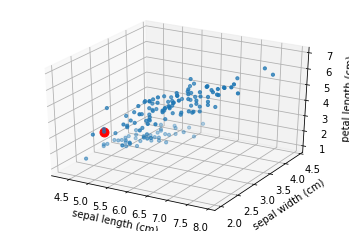

In [71]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(iris_dataset['data'][:,:1], iris_dataset['data'][:,1:2], iris_dataset['data'][:,2:3], marker = 'o', s=10)
ax.scatter(iris_dataset['data'][93,:1], iris_dataset['data'][93,1:2], iris_dataset['data'][93,2:3], c='#ff0000', s=80)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
plt.show()

---
il vicinato del campione evidenziato colorando i vicini per distanza:
calcolare la distanza euclidea tra campione #93 e tutti gli altri campioni (a scopo didattico non utilizzare la funzione "dist()" ma determinare le distanze manualmente con un ciclo)
ordinare le distanze in ordine ascendente (utilizzare "sort()" tenendo traccia degli indici di ordinamento per risalire ai campioni)
individuare i primi 3 vicini ed evidenziarli dal più vicino al più lontano con cerchi rispettivamente di colore verde, blu ed arancione

In [97]:
a=iris_dataset['data'][93,:3]
dist=[]
for sample in range(len(iris_dataset['data'])):
    if sample !=93:
        b=iris_dataset['data'][sample,:3]
        dist.append(np.linalg.norm(a-b))
dist.sort()
dist[:3]

[0.1414213562373093, 0.3605551275463989, 0.374165738677394]

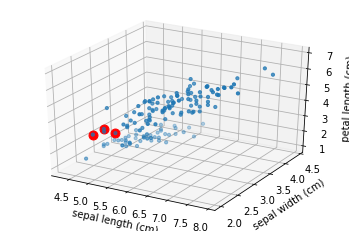

In [98]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(iris_dataset['data'][:,:1], iris_dataset['data'][:,1:2], iris_dataset['data'][:,2:3], marker = 'o', s=10)
for sample in range(len(iris_dataset['data'])):
    if sample !=93:
        b=iris_dataset['data'][sample,:3]
        if np.linalg.norm(a-b) in dist[:3]:
            ax.scatter(iris_dataset['data'][sample,:1], iris_dataset['data'][sample,1:2], iris_dataset['data'][sample,2:3], c='#ff0000', s=80)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
plt.show()

---

---

---
<div class="alert alert-block alert-warning">
    Contact me:</b> <br> 
    <b>$$\rightarrow Pablo \quad Laso\quad Mielgo\quad :)$$<br> $$\rightarrow p.laso.2017@alumnos.urjc.es $$
</div>